# Notebook for the ENS Challenge Data 2022 - Qube Research & Technologies 

# **Learning factors for stock market returns prediction**

### Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '/home/ahardy/ENSchallengeData/' 

X_train = pd.read_csv('data/X_train.csv', index_col=0, sep=',')
X_train.columns.name = 'date'

Y_train = pd.read_csv('data/Y_train.csv', index_col=0, sep=',')
Y_train.columns.name = 'date'

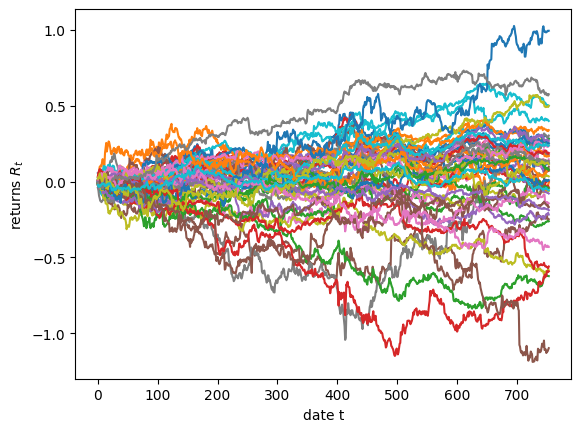

In [2]:
# The cumulative returns of the 50 stocks from the training data set over the three year period 

X_train.T.cumsum().plot(legend=False)
plt.xlabel(f"date t")
plt.ylabel(f"returns $R_t$")
plt.show()

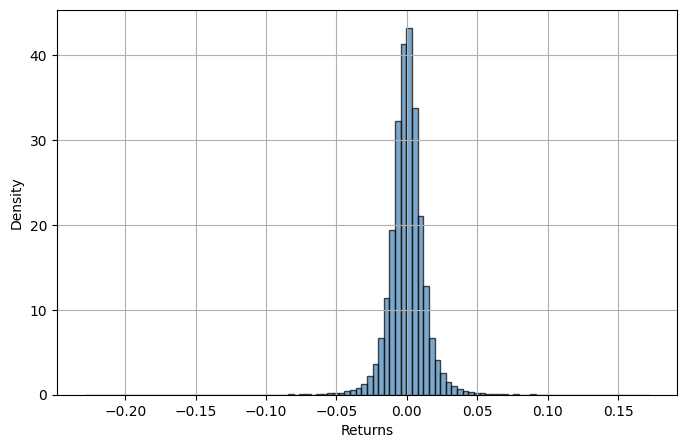

In [30]:
# Flatten all returns into a single array
all_daily_returns = X_train.values.flatten()

plt.figure(figsize=(8, 5))
plt.hist(all_daily_returns, bins=100, density=True, alpha=0.7, color='steelblue', edgecolor='black')
#plt.title("Distribution of the daily returns")
plt.xlabel("Returns")
plt.ylabel("Density")
plt.grid(True)
plt.show()


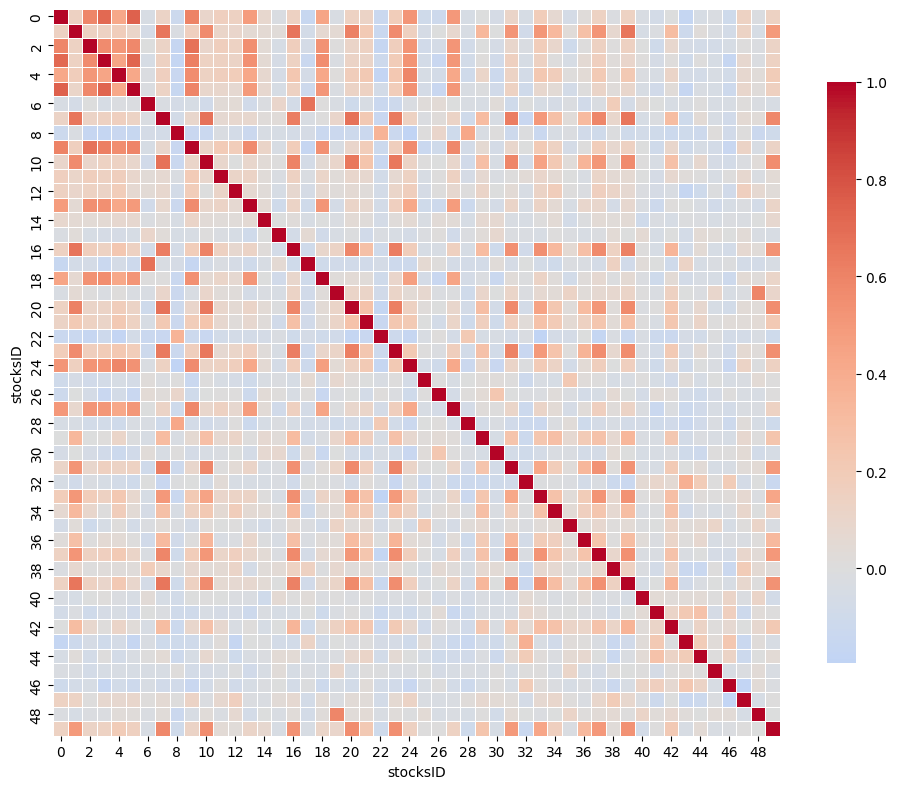

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Étape 1 : Transposer les données pour avoir les actions en colonnes
returns_T = X_train.T  # shape: (jours, actions)

# Étape 2 : Calcul de la matrice de corrélation entre les 50 actions
corr_matrix = returns_T.corr()

# Étape 3 : Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',      # Palette de couleurs
    center=0,             # Pour bien centrer autour de la neutralité
    square=True,          # Pour forcer des cellules carrées
    linewidths=0.5,       # Séparation fine entre les cellules
    cbar_kws={'shrink': 0.8},  # Barre de couleur plus compacte
)

#plt.title("Heatmap of the correlations between the 50 stocks")
plt.tight_layout()
plt.show()


In [24]:
print("Valeurs minimales de la matrice :", corr_matrix.min().min())
print("Valeurs maximales de la matrice :", corr_matrix.max().max())


Valeurs minimales de la matrice : -0.194355208729767
Valeurs maximales de la matrice : 1.0


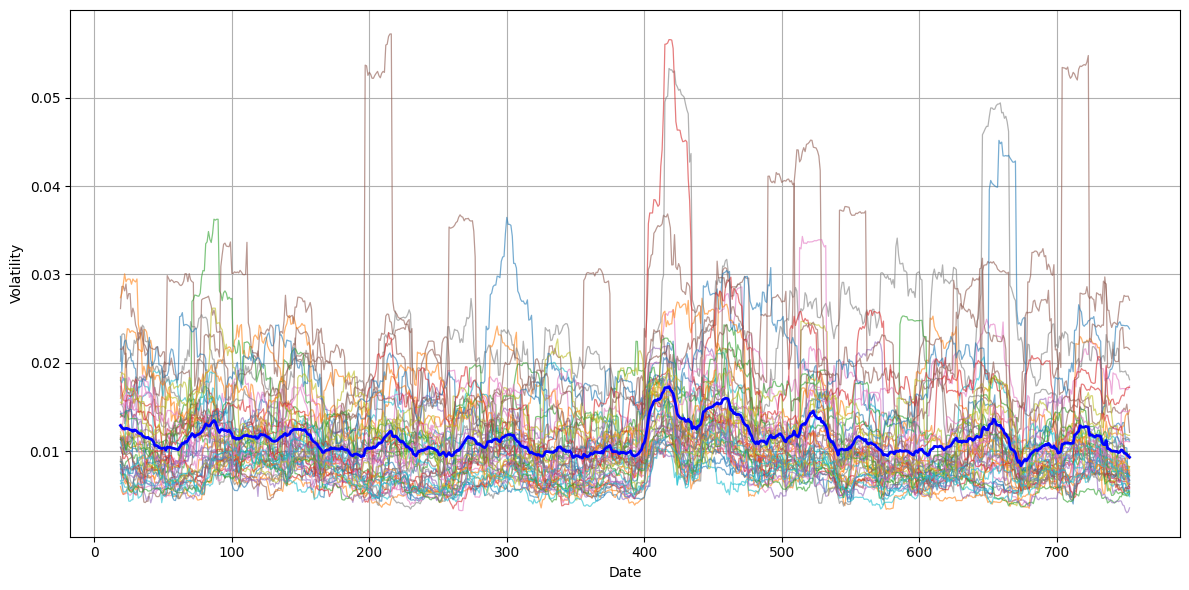

In [38]:
# Calcul de la volatilité glissante (rolling std) sur 20 jours
rolling_vol = X_train.T.rolling(window=20).std()
mean_vol = rolling_vol.mean(axis=1)

plt.figure(figsize=(12, 6))

rolling_vol.plot(ax=plt.gca(), legend=False, alpha=0.6, linewidth=0.9)

# Moyenne des volatilités (en bleu, bien visible)
plt.plot(mean_vol.index, mean_vol, color='blue', linewidth=2)

#plt.title("Sliding volatility on 20 days for the 50 stocks")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
X_train.T

stocksID,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,,,,,,,,,,,,
0,-0.018647,-0.008254,-0.008404,-0.022734,-0.024546,-0.019243,0.000083,-0.015313,-0.001305,-0.020038,...,0.054454,0.031896,-0.008109,0.033008,-0.003656,0.008359,0.012350,-0.006184,0.017914,-0.022667
1,-0.013002,-0.022280,-0.013629,-0.006981,-0.008315,-0.004789,-0.006233,-0.014736,-0.004197,-0.012818,...,-0.009958,0.020950,-0.001532,0.026261,-0.005213,-0.002016,0.016356,-0.011337,0.011649,-0.012398
2,-0.010776,0.012173,-0.006044,-0.008568,-0.007991,-0.004691,-0.009110,-0.000887,-0.019816,-0.013035,...,0.003228,0.005186,0.000809,0.010101,0.005318,0.028789,0.006280,-0.010917,-0.006168,0.000730
3,-0.016676,-0.006820,-0.003425,-0.010899,-0.003515,0.002805,0.054403,-0.007216,-0.005595,-0.006182,...,-0.002271,0.038125,-0.000351,0.012020,0.006399,-0.002400,-0.001466,0.005750,0.028425,0.007258
4,-0.005110,-0.004055,-0.009522,-0.017981,0.007872,-0.006069,-0.012260,-0.002479,0.008634,-0.022030,...,-0.030167,0.005030,-0.014674,-0.006336,-0.002130,-0.056018,0.003624,-0.013155,-0.010859,-0.005218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,-0.001236,-0.004026,-0.000343,0.001201,0.007695,0.007474,-0.006070,0.000125,0.002379,0.000802,...,0.000109,-0.006120,0.000421,-0.003802,-0.001963,-0.023981,-0.004295,-0.008224,0.001535,-0.001814
750,-0.002732,-0.004672,0.001757,-0.003669,0.003775,-0.002425,0.000114,-0.009989,0.001253,0.002215,...,0.004044,0.015217,0.004890,0.034763,-0.000907,0.012294,0.005138,-0.007828,0.001903,-0.007145
751,0.013074,-0.002889,0.004972,0.008690,0.005097,0.003741,0.004040,0.000157,-0.003839,0.006829,...,0.006168,0.003466,-0.001115,-0.005417,-0.000509,-0.001861,0.003698,0.006122,0.001956,-0.002696


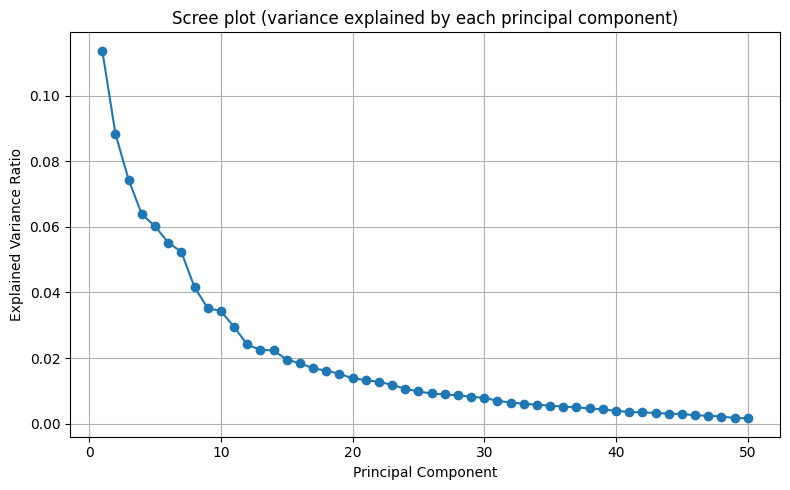

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Transposer pour avoir : lignes = jours, colonnes = actions
returns_T = X_train.T

# Centrage des données
X_centered = returns_T - returns_T.mean()

# PCA
pca = PCA()
pca.fit(X_centered)

# Scree plot (variance expliquée)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title("Scree plot (variance explained by each principal component)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()


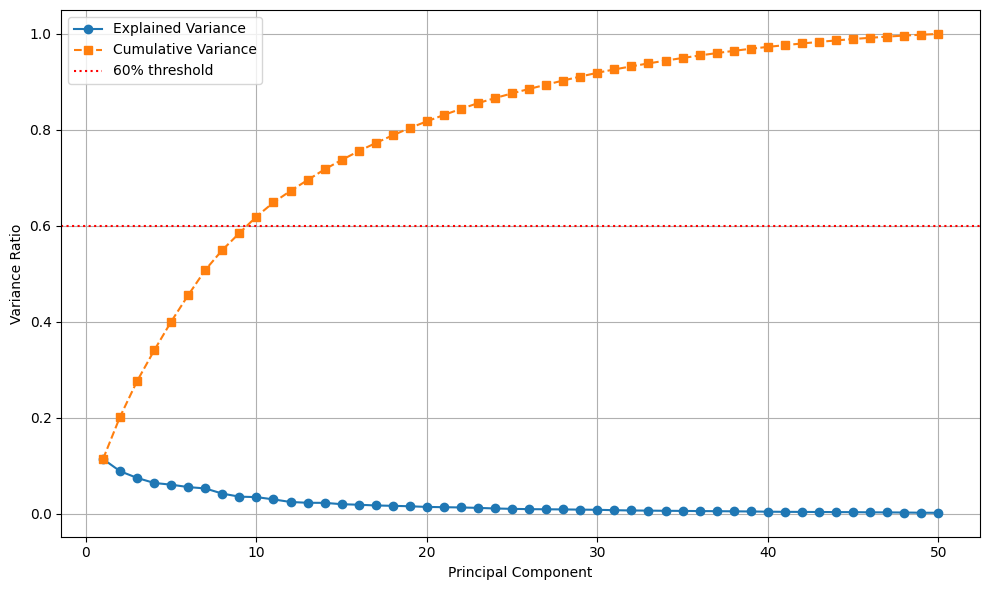

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Transposer pour avoir (jours x actions)
returns_T = X_train.T
X_centered = returns_T - returns_T.mean()

# PCA
pca = PCA()
pca.fit(X_centered)

# Variance expliquée et cumulée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot
plt.figure(figsize=(10, 6))

# Variance expliquée
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o', label='Explained Variance')

# Variance cumulée
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='s', linestyle='--', label='Cumulative Variance')

# Ligne de référence à 90%
plt.axhline(y=0.6, color='red', linestyle=':', label='60% threshold')

#plt.title("Explained vs. Cumulative Variance (PCA)")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


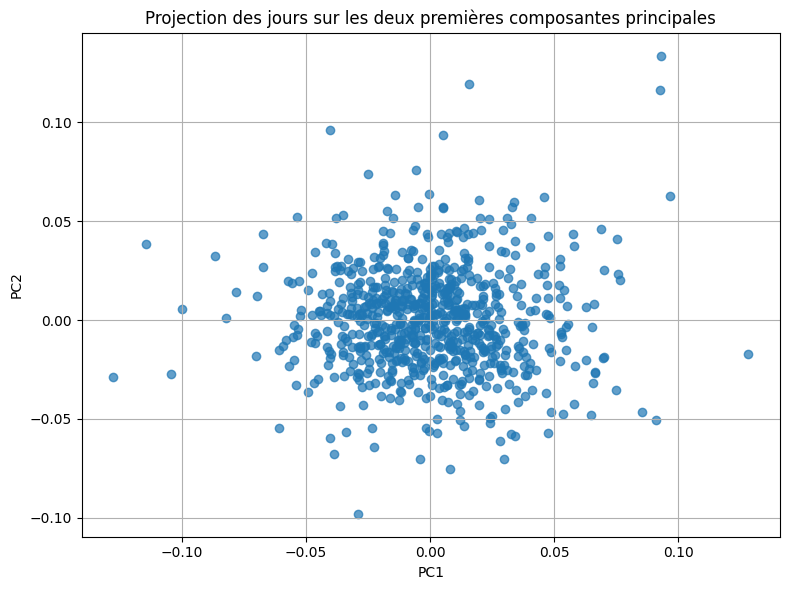

In [41]:
# Project the stocks onto the first two principal components
X_pca = pca.transform(X_centered)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title("Projection des jours sur les deux premières composantes principales")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
X_train_reshape = pd.concat(
    [X_train.T.shift(i + 1).stack(dropna=False) for i in range(250)],
    axis=1
).dropna()
X_train_reshape.columns = pd.Index(range(1, 251), name='timeLag')

C:\Users\briac\AppData\Local\Temp\ipykernel_18848\3316512093.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  [X_train.T.shift(i + 1).stack(dropna=False) for i in range(250)],
C:\Users\briac\AppData\Local\Temp\ipykernel_18848\3316512093.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  [X_train.T.shift(i + 1).stack(dropna=False) for i in range(250)],
C:\Users\briac\AppData\Local\Temp\ipykernel_18848\3316512093.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for panda

In [4]:
X_train_reshape.shape

(25200, 250)

The motivation is that, given model parameters 'A' and 'beta', the associated predictions for Y_train are simply given by **Ypred = ( X_train_reshape @ A @ beta ).unstack().T**

# The prediction model

## Stiefel matrices

##### Example 1: autoregressive model AR(F)

In [5]:
def autoRegA(D=250, F=10):
    
    A = np.zeros((D,F))
    for i in range(F): 
        A[i,i] = 1
    
    return A

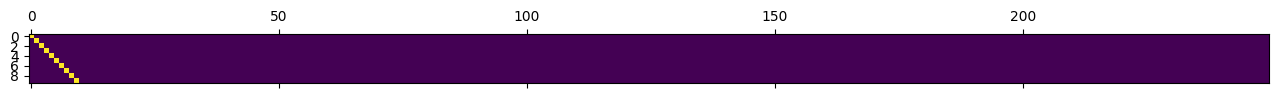

In [6]:
A = autoRegA()
plt.matshow(A.T)
plt.show()

##### Example 2: uniformly random Stiefel matrix A

In [6]:
def randomA(D=250, F=10):  
    
    M = np.random.randn(D,F)
    randomStiefel = np.linalg.qr(M)[0] # Apply Gram-Schmidt algorithm to the columns of M
    
    return randomStiefel

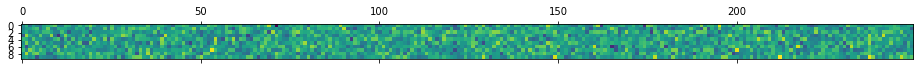

In [7]:
A = randomA()
plt.matshow(A.T)
plt.show()

In [8]:
# to check the orthonormality constraints as in the metric:
    
def checkOrthonormality(A): 
    
    bool = True
    D, F = A.shape   
    Error = pd.DataFrame(A.T @ A - np.eye(F)).abs()
    
    if any(Error.unstack() > 1e-6):
        bool = False
     
    return bool

In [9]:
checkOrthonormality(A)

True

## Beta parameters

##### Example 1: "keep the $m$ first factor only" 

In [10]:
def firstBeta(m=1, F=10):

    beta = np.zeros(F)
    beta[:m] = 1
    
    return beta

##### Example 2: given a Stiefel matrix A, return the beta with minimal mean square prediction error on the training data set

In [11]:
def fitBeta(A):
    
    predictors = X_train_reshape @ A # the dataframe of the 10 factors created from A with the (date, stock) in index
    targets = Y_train.T.stack()
    beta = np.linalg.inv(predictors.T @ predictors) @ predictors.T @ targets
    
    return beta.to_numpy()

## Metric on the training data set

The function **metric_train** below computes the *in sample* version of the metric for parameters 'A' and 'beta', using the accessible data sets 'X_train' and 'Y_train'. 

The true metric of the challenge is defined the same way except that we use the hidden data sets 'X_test' and 'Y_test' instead of 'X_train' and 'Y_train' (recall the latter contain the returns of 50 *other* stocks from the same stock market and on the *same* time period). 

In [12]:
def metric_train(A, beta): 
    
    if not checkOrthonormality(A):
        return -1.0    
    
    Ypred = (X_train_reshape @ A @ beta).unstack().T         
    Ytrue = Y_train
    
    Ytrue = Ytrue.div(np.sqrt((Ytrue**2).sum()), 1)    
    Ypred = Ypred.div(np.sqrt((Ypred**2).sum()), 1)

    meanOverlap = (Ytrue * Ypred).sum().mean()

    return  meanOverlap  

# Examples

##### Test 1: The autoregressive model AR(10)
$$
S_{t+1} := \sum_{\ell=1}^{10} \beta_\ell R_{t+1-\ell}
$$
where the $\beta_\ell$'s are fitted by minimizing the mean square prediction error on the training data set. 

In [21]:
A = autoRegA()
beta = fitBeta(A)

metric_train(A, beta) # public metric: 0.01282

0.02402799094688755

##### Test 2: The two factor model using '5-day returns' and 'momentum'
This model is suggested in the description of the challenge and reads
$$
S_{t+1} := \beta_1 \,R_t^{(5)} + \beta_2 \,R_{t-20}^{(230)},\qquad \text{ with }\quad R_t^{(m)}:= \frac1{\sqrt{m}}\sum_{k=1}^{m} R_{t+1-k},
$$
where we find the parameters $\beta_1$ and $\beta_2$ by minimizing the mean square prediction error on the training data set.  

*NB: the construction below actually shows how a model with $F\leq 10$ factors be recasted into the framework of the challenge.*

In [23]:
# Step 1: Create a 250x10 matrix A with the two first columns representing the factors of interest

A = np.zeros((250,10))

A[0:5, 0] = 1/np.sqrt(5) # 5-day return factor
A[20:250, 1] = 1/np.sqrt(230) # momentum factor

# Step 2: Fill the remaining columns of A with random orthonormal vectors, that are orthogonal to the two first columns

orthoProj = np.eye(250) - np.outer(A[:, 0], A[:, 0]) - np.outer(A[:, 1], A[:, 1]) # projection matrix on the orthogonal to the span of A[:,0] and A[:,1]
A_remaining_columns = orthoProj @ np.random.randn(250, 8) # sample random vectors in the space orthogonal to the first two columns of A
A_remaining_columns = np.linalg.qr(A_remaining_columns)[0] # orthonormalize these vectors with Gram-Schmidt algorithm
A[:, 2:] = A_remaining_columns

# Step 3: Compute the mean square optimal beta_1, beta_2 and then complete the vector beta with zeros

predictors = X_train_reshape @ A[:, :2]
targets = Y_train.T.stack()
beta = np.linalg.inv(predictors.T @ predictors) @ predictors.T @ targets
beta = np.hstack([beta, np.zeros(8)])


metric_train(A, beta) # public metric: 0.01787

0.019538512062321135

# The benchmark

This the code for the benchmark provided in the challenge description. 

In [15]:
Niter = 1000
maxMetric = -1

np.random.seed(1234)

for iteration in range(Niter):
    
    # Generate a uniform random Stiefel matric A and fit beta with minimal mean square prediction error on the training data set
    
    A = randomA()
    beta = fitBeta(A)
    
    # compute the metric on the training set and keep the best result   
    
    m = metric_train(A, beta)
        
    if m > maxMetric:
        print(iteration, 'metric_train:', m)
        
        maxMetric = m
        A_QRT = A
        beta_QRT = beta  

0 metric_train: 0.02331346933035967
1 metric_train: 0.03319696206337413
3 metric_train: 0.03530204860763573
7 metric_train: 0.03999544914662607
67 metric_train: 0.043593689369261154
138 metric_train: 0.044332621329282965
496 metric_train: 0.04441416345796446
675 metric_train: 0.045787821873291355


In [16]:
metric_train(A_QRT, beta_QRT) # public metric: 0.03535

0.045787821873291355

# Postprocessing

## From $(A, \beta)$ to the output csv format

In [30]:
def parametersTransform(A, beta, D=250, F=10):
    
    if A.shape != (D, F):
        print('A has not the good shape')
        return
    
    if beta.shape[0] != F:
        print('beta has not the good shape')
        return        
    
    output = np.hstack( (np.hstack([A.T, beta.reshape((F, 1))])).T )
    
    return output

In [34]:
# random submission example
np.random.seed(1234)

A = randomA()
beta = np.random.rand(10)

# from output to csv file...
output = parametersTransform(A, beta)
pd.DataFrame(output).to_csv(path + 'submissionExample.csv')

# ... and back
output_fromCsv = pd.read_csv(path + 'submissionExample.csv', index_col=0, sep=',').to_numpy()
A = output_fromCsv[:-10].reshape((250, 10))
beta = output_fromCsv[-10:].reshape((10))